In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [139]:
train = pd.read_csv('SalaryData_Train.csv.crdownload')

In [141]:
test = pd.read_csv('SalaryData_Test.csv.crdownload')

In [142]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0.0,0.0,38.0,United-States,<=50K
1336,25,Private,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,3325.0,0.0,45.0,United-States,<=50K
1337,22,Private,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1338,41,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [143]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,46,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,1887.0,45.0,United-States,>50K
4824,55,Self-emp-inc,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Male,0.0,2444.0,60.0,United-States,>50K
4825,44,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Female,0.0,1980.0,40.0,United-States,<=50K
4826,50,Private,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1340 non-null   int64  
 1   workclass      1340 non-null   object 
 2   education      1340 non-null   object 
 3   educationno    1340 non-null   int64  
 4   maritalstatus  1340 non-null   object 
 5   occupation     1340 non-null   object 
 6   relationship   1339 non-null   object 
 7   race           1339 non-null   object 
 8   sex            1339 non-null   object 
 9   capitalgain    1339 non-null   float64
 10  capitalloss    1339 non-null   float64
 11  hoursperweek   1339 non-null   float64
 12  native         1339 non-null   object 
 13  Salary         1339 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 146.7+ KB


In [145]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,1340.000000,1340.000000,1339.000000,1339.000000,1339.000000
mean,38.591045,10.232090,716.477222,96.942494,41.119492
std,12.793117,2.457225,4535.161957,418.357035,11.610420
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2415.000000,99.000000


In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4828 non-null   int64  
 1   workclass      4828 non-null   object 
 2   education      4828 non-null   object 
 3   educationno    4828 non-null   int64  
 4   maritalstatus  4828 non-null   object 
 5   occupation     4828 non-null   object 
 6   relationship   4827 non-null   object 
 7   race           4827 non-null   object 
 8   sex            4827 non-null   object 
 9   capitalgain    4827 non-null   float64
 10  capitalloss    4827 non-null   float64
 11  hoursperweek   4827 non-null   float64
 12  native         4827 non-null   object 
 13  Salary         4827 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 528.2+ KB


In [147]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,4828.000000,4828.000000,4827.000000,4827.000000,4827.000000
mean,38.571665,10.100870,1196.087425,93.153304,40.919204
std,13.357588,2.580058,8104.608650,417.137189,12.155766
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3175.000000,99.000000


In [148]:
test['maritalstatus'].value_counts()

maritalstatus
Married-civ-spouse       2212
Never-married            1586
Divorced                  669
Widowed                   160
Separated                 144
Married-spouse-absent      54
Married-AF-spouse           3
Name: count, dtype: int64

In [149]:
train[train.duplicated()].shape

(11, 14)

In [150]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
795,33,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
869,20,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
958,43,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
965,61,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
993,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [151]:
Train =train.drop_duplicates()

In [152]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0.0,0.0,38.0,United-States,<=50K
1336,25,Private,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,3325.0,0.0,45.0,United-States,<=50K
1337,22,Private,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
1338,41,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [153]:
Train.isnull().sum().sum()
## there is no nan values in the Train Data set

8

In [154]:
test[test.duplicated()].shape

(118, 14)

In [155]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,35.0,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,24,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
4758,21,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0.0,0.0,25.0,United-States,<=50K
4796,49,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,75.0,United-States,>50K
4806,23,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [156]:
Test=test.drop_duplicates()

In [157]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,46,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,1887.0,45.0,United-States,>50K
4824,55,Self-emp-inc,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Male,0.0,2444.0,60.0,United-States,>50K
4825,44,Private,Assoc-acdm,12,Divorced,Exec-managerial,Not-in-family,White,Female,0.0,1980.0,40.0,United-States,<=50K
4826,50,Private,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [158]:
Test.isnull().sum().sum()
## there is no nan values in the Train Data set

8

In [159]:
Train['Salary'].value_counts()

Salary
<=50K    993
>50K     335
Name: count, dtype: int64

In [160]:
Test['Salary'].value_counts()

Salary
<=50K    3543
>50K     1166
Name: count, dtype: int64

In [161]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,126,22
Armed-Forces,2,0
Craft-repair,130,39
Exec-managerial,80,84
Farming-fishing,32,7
Handlers-cleaners,52,2
Machine-op-inspct,74,11
Other-service,151,9
Priv-house-serv,4,0


In [162]:
pd.crosstab(Train['workclass'],Train['Salary'])


Salary,<=50K,>50K
workclass,,
Federal-gov,22,17
Local-gov,71,19
Private,759,213
Self-emp-inc,22,36
Self-emp-not-inc,85,31
State-gov,34,19


In [163]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exe,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,,
Federal-gov,14,2,1,0,8,1,1,0,1,0,7,0,2,2,0
Local-gov,15,0,4,0,7,4,2,2,10,0,23,12,0,4,7
Private,109,0,135,0,97,15,48,79,136,4,113,3,122,47,64
Self-emp-inc,0,0,6,1,24,3,0,2,1,0,4,0,14,1,3
Self-emp-not-inc,0,0,22,0,22,16,3,0,8,0,17,0,23,1,4
State-gov,10,0,1,0,6,0,0,2,4,0,17,8,0,3,2


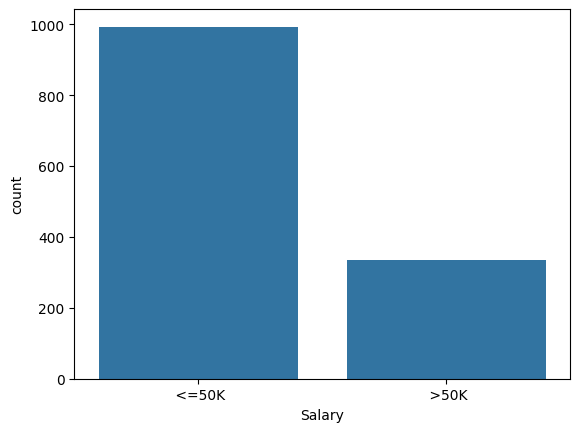

Salary
<=50K    993
>50K     335
Name: count, dtype: int64

In [164]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

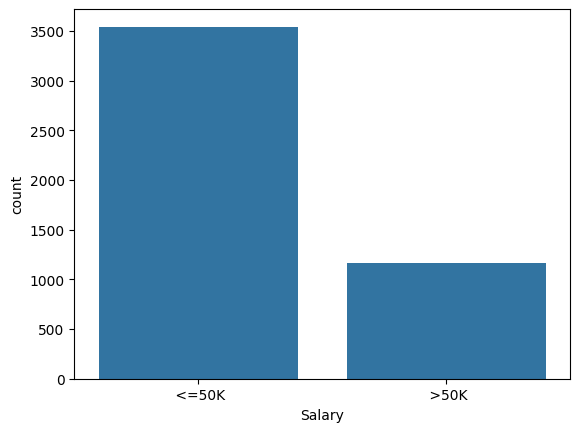

Salary
<=50K    3543
>50K     1166
Name: count, dtype: int64

In [165]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

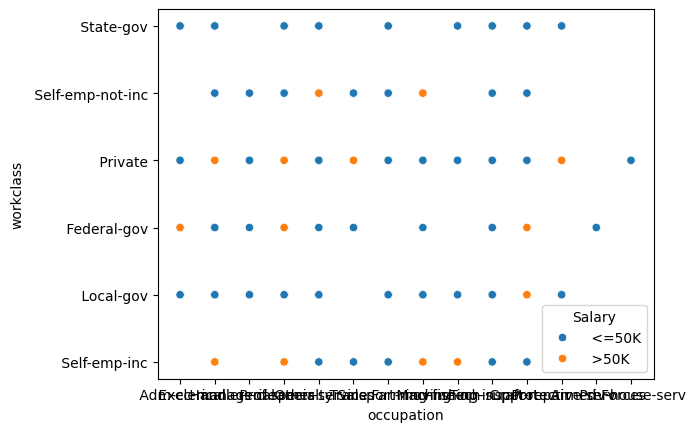

In [167]:
sns.scatterplot(x="occupation", y="workclass", hue="Salary", data=Train)

<Axes: xlabel='education'>

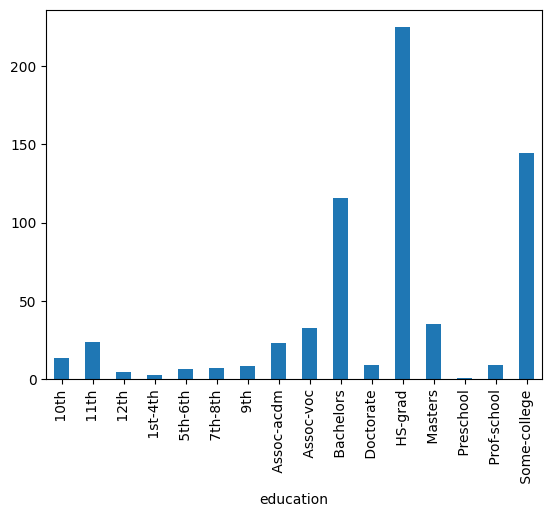

In [168]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

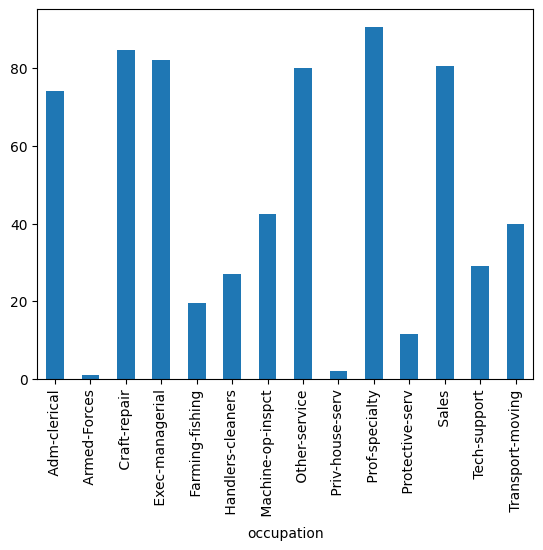

In [169]:

pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

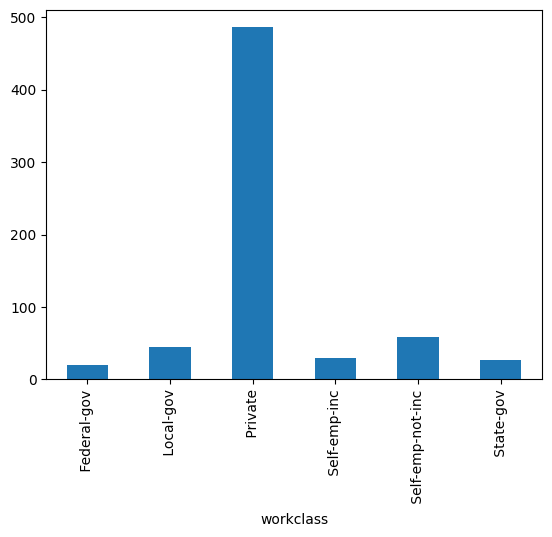

In [170]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

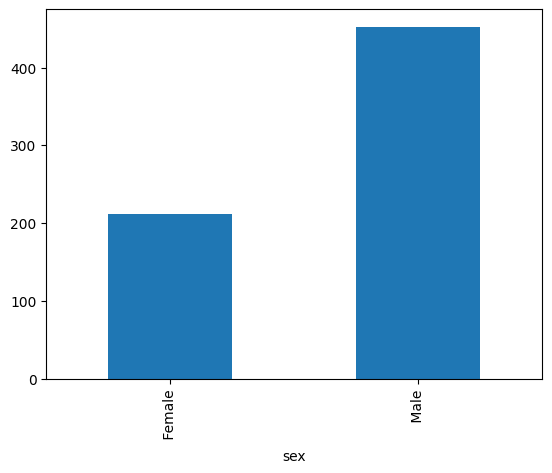

In [171]:

pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

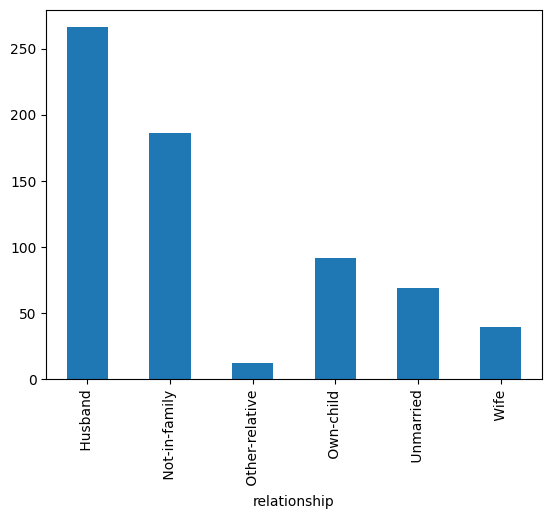

In [172]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

In [173]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [174]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [175]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,29,<=50K
1,50,4,9,13,2,4,0,4,1,0.0,0.0,13.0,29,<=50K
2,38,2,11,9,0,6,1,4,1,0.0,0.0,40.0,29,<=50K
3,53,2,1,7,2,6,0,2,1,0.0,0.0,40.0,29,<=50K
4,28,2,9,13,2,10,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,56,2,11,9,6,0,4,2,0,0.0,0.0,38.0,29,<=50K
1336,25,2,11,9,0,2,1,4,1,3325.0,0.0,45.0,29,<=50K
1337,22,2,15,10,4,14,1,4,1,0.0,0.0,40.0,29,<=50K
1338,41,3,14,15,2,10,0,4,1,0.0,0.0,60.0,29,>50K


In [176]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,7,3,2,1,0.0,0.0,40.0,37,<=50K
1,38,2,11,9,2,5,0,4,1,0.0,0.0,50.0,37,<=50K
2,28,1,7,12,2,11,0,4,1,0.0,0.0,40.0,37,>50K
3,44,2,15,10,2,7,0,2,1,7688.0,0.0,40.0,37,>50K
4,34,2,0,6,4,8,1,4,1,0.0,0.0,30.0,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,46,3,11,9,2,12,0,4,1,0.0,1887.0,45.0,37,>50K
4824,55,3,11,9,0,4,4,4,1,0.0,2444.0,60.0,37,>50K
4825,44,2,7,12,0,4,1,4,0,0.0,1980.0,40.0,37,<=50K
4826,50,2,8,11,2,11,0,4,1,0.0,0.0,40.0,37,<=50K


In [177]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [178]:
len(colnames)

14

In [179]:
Train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,29,<=50K
1,50,4,9,13,2,4,0,4,1,0.0,0.0,13.0,29,<=50K
2,38,2,11,9,0,6,1,4,1,0.0,0.0,40.0,29,<=50K
3,53,2,1,7,2,6,0,2,1,0.0,0.0,40.0,29,<=50K
4,28,2,9,13,2,10,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,56,2,11,9,6,0,4,2,0,0.0,0.0,38.0,29,<=50K
1336,25,2,11,9,0,2,1,4,1,3325.0,0.0,45.0,29,<=50K
1337,22,2,15,10,4,14,1,4,1,0.0,0.0,40.0,29,<=50K
1338,41,3,14,15,2,10,0,4,1,0.0,0.0,60.0,29,>50K


In [180]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,7,3,2,1,0.0,0.0,40.0,37,<=50K
1,38,2,11,9,2,5,0,4,1,0.0,0.0,50.0,37,<=50K
2,28,1,7,12,2,11,0,4,1,0.0,0.0,40.0,37,>50K
3,44,2,15,10,2,7,0,2,1,7688.0,0.0,40.0,37,>50K
4,34,2,0,6,4,8,1,4,1,0.0,0.0,30.0,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,46,3,11,9,2,12,0,4,1,0.0,1887.0,45.0,37,>50K
4824,55,3,11,9,0,4,4,4,1,0.0,2444.0,60.0,37,>50K
4825,44,2,7,12,0,4,1,4,0,0.0,1980.0,40.0,37,<=50K
4826,50,2,8,11,2,11,0,4,1,0.0,0.0,40.0,37,<=50K


In [181]:
Test['maritalstatus'].value_counts()

maritalstatus
2    2147
4    1540
0     662
6     160
5     144
3      54
1       3
Name: count, dtype: int64

In [182]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values


In [183]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [184]:
x_train

array([[39.,  5.,  9., ...,  0., 40., 29.],
       [50.,  4.,  9., ...,  0., 13., 29.],
       [38.,  2., 11., ...,  0., 40., 29.],
       ...,
       [22.,  2., 15., ...,  0., 40., 29.],
       [41.,  3., 14., ...,  0., 60., 29.],
       [48.,  3., 11., ..., nan, nan, 31.]])

In [185]:
x_test

array([[2.50e+01, 2.00e+00, 1.00e+00, ..., 0.00e+00, 4.00e+01, 3.70e+01],
       [3.80e+01, 2.00e+00, 1.10e+01, ..., 0.00e+00, 5.00e+01, 3.70e+01],
       [2.80e+01, 1.00e+00, 7.00e+00, ..., 0.00e+00, 4.00e+01, 3.70e+01],
       ...,
       [4.40e+01, 2.00e+00, 7.00e+00, ..., 1.98e+03, 4.00e+01, 3.70e+01],
       [5.00e+01, 2.00e+00, 8.00e+00, ..., 0.00e+00, 4.00e+01, 3.70e+01],
       [5.80e+01, 2.00e+00, 1.10e+01, ...,      nan,      nan, 4.00e+01]])

In [186]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', nan],
      dtype=object)

In [187]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', nan],
      dtype=object)

In [188]:

x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [196]:
x_train=pd.DataFrame(x_train)
# x_train = x_train.dropna()
x_train = x_train.dropna()
x_train = X_train_dropna.to_numpy()

# y_train = y_train.iloc[X_train_dropna.index]

In [197]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)


ValueError: Input contains NaN

In [198]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi ## train accuracy 74.42

NameError: name 'train_pred_multi' is not defined

In [199]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

NameError: name 'test_pred_multi' is not defined

In [200]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

NameError: name 'test_pred_multi' is not defined